In [1]:
from data_access.data_source import DataSource
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
ds = DataSource()
primary_df = ds.get_primary_data_frame()
secondary_df = ds.get_secondary_data_frame()


In [3]:
primary_df.columns


Index(['family', 'name', 'class', 'cap-diameter', 'cap-shape', 'cap-surface',
       'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing',
       'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface',
       'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type',
       'spore-print-color', 'habitat', 'season'],
      dtype='object')

In [4]:
secondary_df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [5]:
secondary_df['cap-diameter'].describe()

count    61069.000000
mean         6.733854
std          5.264845
min          0.380000
25%          3.480000
50%          5.860000
75%          8.540000
max         62.340000
Name: cap-diameter, dtype: float64

<AxesSubplot:xlabel='cap-diameter', ylabel='Density'>

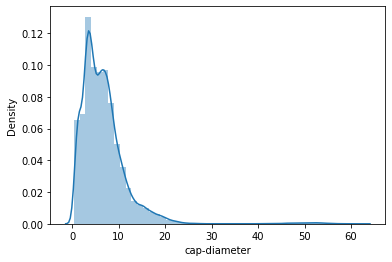

In [6]:
sns.distplot(secondary_df['cap-diameter'])

In [7]:
print('Skewness: {}'.format(secondary_df['cap-diameter'].skew()))
print('Kurtosis: {}'.format(secondary_df['cap-diameter'].kurt()))

Skewness: 3.8228439765098257
Kurtosis: 27.077466724882328


<AxesSubplot:xlabel='stem-height', ylabel='cap-diameter'>

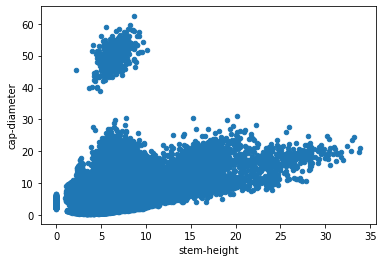

In [8]:
diam= 'cap-diameter'
surf = 'stem-height'
data = pd.concat([secondary_df[diam], secondary_df[surf]], axis=1)
data.plot.scatter(y=diam,x=surf)


<AxesSubplot:xlabel='stem-width', ylabel='cap-diameter'>

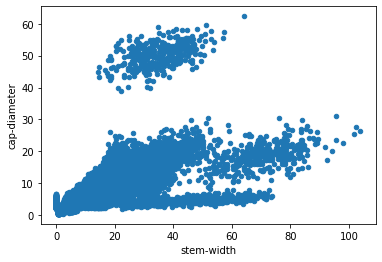

In [9]:
wid = "stem-width"
vector = pd.concat([secondary_df[diam], secondary_df[wid]], axis=1)
vector.plot.scatter(y=diam, x=wid)

0        17.09
1        18.19
2        17.74
3        15.98
4        17.20
         ...  
61064     6.22
61065     5.43
61066     6.37
61067     5.44
61068     5.45
Name: stem-width, Length: 61069, dtype: float64

(-0.5, 6.5, 0.0, 90.0)

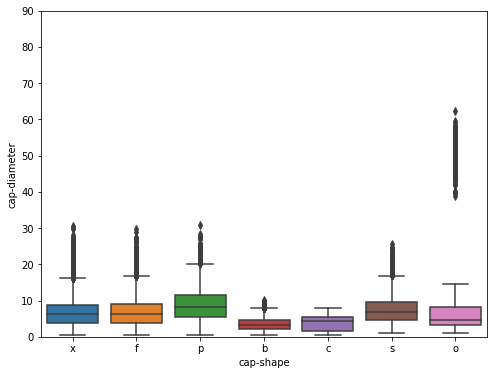

In [26]:
shp = 'cap-shape'
boxes = pd.concat([ds.get_secondary_data_frame()[diam], ds.get_secondary_data_frame()[shp]], axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(y=boxes[diam], x=boxes[shp])
fig.axis(ymin=0, ymax=90)



(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'd'),
  Text(1, 0, 'm'),
  Text(2, 0, 'g'),
  Text(3, 0, 'h'),
  Text(4, 0, 'l'),
  Text(5, 0, 'p'),
  Text(6, 0, 'w'),
  Text(7, 0, 'u')])

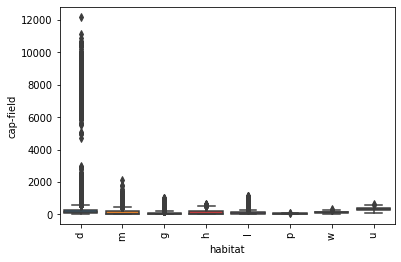

In [32]:
hb = 'habitat'
cp = np.multiply(np.power(np.array(secondary_df['cap-diameter']),2), np.pi)
bxs = pd.concat([secondary_df[hb], pd.DataFrame({"cap-field":cp})], axis=1)
fig = sns.boxplot(y=bxs['cap-field'], x=bxs[hb])
plt.xticks(rotation=90)

In [43]:
total = secondary_df.isnull().sum().sort_values(ascending=False)
percent=(secondary_df.isnull().sum()/secondary_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
veil-type,57892,0.947977
spore-print-color,54715,0.895954
veil-color,53656,0.878613
stem-root,51538,0.843931
stem-surface,38124,0.624277
gill-spacing,25063,0.410405
cap-surface,14120,0.231214
gill-attachment,9884,0.161850
ring-type,2471,0.040462
class,0,0.000000


In [44]:
secondary_df['veil-type']


0          u
1          u
2          u
3          u
4          u
        ... 
61064    NaN
61065    NaN
61066    NaN
61067    NaN
61068    NaN
Name: veil-type, Length: 61069, dtype: object